## STAT 207 Lab 6: Confidence Intervals and Hypothesis Tests

Due: Wednesday, March 11, 23:59:59

### Michael Cao - minhcao2

This lab consists of three main parts. We will analyze the lead exposure data, and data from a study of mother's smoking status and child's birth weight.

### Part 1: Preliminary analysis of lead study (9 pts)

The file 'leadstudy.csv' is included in the same folder as this lab notebook. It contains data from the lead exposure study discussed in our class notes. We will focus on the response variable 'fulliq', which is an IQ test measurement, and the lead exposure level 'group', which has the values 'lead < 40' and 'lead >= 40'.

**a) (1 pt) Read 'leadstudy.csv' into a data frame and display the first 5 rows.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("leadstudy.csv")
df.head(n =10)

,id,age,sex,status,verbiq,perfiq,fulliq,iqtype,totyrs,group
0,101,11.083333,M,77,61,85,70,WISC,11,lead < 40
1,102,9.416667,M,77,82,90,85,WISC,6,lead < 40
2,103,11.083333,M,30,70,107,86,WISC,5,lead < 40
3,104,6.916667,M,77,72,85,76,WISC,5,lead < 40
4,105,11.250000,M,62,72,100,84,WISC,11,lead < 40
5,106,6.500000,M,72,95,97,96,WISC,6,lead < 40
6,107,6.916667,M,54,89,101,94,WISC,6,lead < 40
7,108,15.000000,F,73,57,64,56,WISC,15,lead < 40
8,109,7.166667,F,22,116,111,115,WISC,7,lead < 40
9,110,7.250000,M,77,95,100,97,WISC,7,lead < 40


**b) (2 pts) Display a histogram of 'fulliq'. On the histogram plot include a vertical line at the value x=100, to indicate the value that is expected to be the mean value in a typical population. See examples of graphs with vertical lines in the class notes and online documentation for matplotlib.pyplot.vlines.**

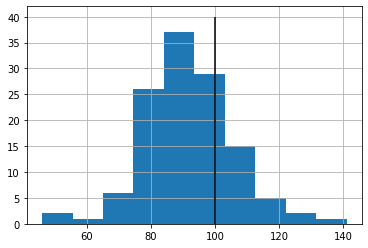

In [4]:
df["fulliq"].hist()
plt.vlines( x = 100, ymin = 0, ymax = 40)

**c) (3 pts) Compute and display the sample size n, the sample mean, the sample standard deviation and the standard error for the mean of the variable 'fulliq'.**

In [29]:
len(df["fulliq"])

124

In [35]:
mean = df["fulliq"].mean()
mean

91.08064516129032

In [31]:
df["fulliq"].std()

14.403927182528031

In [36]:
se = df["fulliq"].std() / (len(df["fulliq"]))** 0.5
se

1.2935108459948101

**d) (2 pts) Compute an approximate 99% confidence interval for the mean value of 'fulliq' for this population of children.**

In [33]:
from scipy.stats import norm
z99 = norm.ppf(.995)
z99

2.5758293035489004

In [38]:
upperBound = mean + z99*se
lowerBound = mean - z99*se
print(upperBound)
print(lowerBound)

94.41250830286208
87.74878201971856


**e) (1 pt) Based on your results, is the population mean signficiantly different from the standard value of 100 at an $\alpha$ significance level of 0.01?**

The difference is significant because the value not in the interval

### Part 2: Comparison of subgroups in the lead study (6 pts)

In this part we analyze the relation between exposure group and 'fulliq'. We compare the mean 'fulliq' for low lead exposure ('group'=='lead < 40') and high exposure ('group'== 'lead >= 40'). We will determine if there is a statistically significant difference.

**a) (2 pts) For the low exposure group ('lead < 40'), compute the number of observations (nobs), sample mean (xbar), sample standard deviation (s) and standard error for the mean (se). Display the results with labels.**

In [41]:
age1 = df[df['group']=='lead < 40']
nobs = len(age1)
nobs

78

In [44]:
xbar = age1["fulliq"].mean()
xbar

92.88461538461539

In [46]:
s = age1["fulliq"].std()
s

15.34451191644902

In [48]:
se = s / nobs**0.5
se

1.7374238443153303

**b) (1 pt) For the high exposure group ('lead >= 40'), compute the number of observations (nobs), sample mean (xbar), sample standard deviation (s) and standard error for the mean (se). Display the results with labels.**

In [53]:
age2 = df[df['group']=='lead >= 40']
nobs = len(age2)
nobs

46

In [54]:
xbar = age2["fulliq"].mean()
xbar

88.02173913043478

In [56]:
s = age2["fulliq"].std()
s

12.206535827507023

In [57]:
se = s / nobs**0.5
se

1.7997555202824715

**c) (3 pts) Use the ttest_ind function from scipy.stats, or the related myttest_ind function we defined in class notes, to test the null hypothesis of no mean difference in 'fulliq' between the low exposure and high exposure groups in the population. Report the value of the t-test statistic and the p-value.**

In [59]:
from scipy.stats import t
from scipy.stats import ttest_ind
ttest_ind(age1["fulliq"], age2["fulliq"], equal_var=False)

Ttest_indResult(statistic=1.9439438351740033, pvalue=0.054423965479957315)

### Part 3: Birthweight versus mother's smoking status (10 pts)

As reported in Hosmer, D.W. and Lemeshow, S. (1989) *Applied Logistic Regression*. New York: Wiley, data on birth weights of newborn babies and smoking status of their mothers were collected at Baystate Medical Center, Springfield, Mass during 1986. It was recorded whether or not the child had a low birthweight below a certain threshold weight, and whether or not the mother had smoked during pregnancy.

There were 189 births in the study. Of those, 59 of the mothers were smokers, and 130 were nonsmokers during pregnancy:

In [60]:
nobs = pd.Series([59, 130], index=['smoker', 'nonsmoker'])
print('nobs: 189')
print(nobs.to_string(dtype=False))

nobs: 189
smoker        59
nonsmoker    130


The frequency of low birthweight was 30 among the smokers and 44 among nonsmokers:

In [61]:
low_bwt = pd.Series([30, 44], index=['smoker', 'nonsmoker'])
print('low_bwt: 77')
print(low_bwt.to_string(dtype=False))

low_bwt: 77
smoker       30
nonsmoker    44


**a) (2 pts) Compute the sample proportions of low birth weight for smokers and nonsmokers. Make sure the output labels the two proportions so we know which group corresponds to which proportion.**

In [68]:
proOfSmoker = 30 / 59
proOfNonSmoker = 44 / 130
print(proOfSmoker)
print(proOfNonSmoker)

0.5084745762711864
0.3384615384615385


**b) (2 pts) Considering the sample proportions to be estimates of population proportions for smokers and nonsmokers, compute standard errors for the two proportions.**

In [69]:
seOfSmoker = (proOfSmoker * (1 - proOfSmoker) / 59)**0.5
print(seOfSmoker)
seOfNonSmoker = (proOfNonSmoker * (1 - proOfNonSmoker) / 130)**0.5
print(seOfNonSmoker)

0.06508510485393613
0.04150118862466351


**c) (2 pts) Compute the difference between the two proportions, and the standard error for the difference.**

In [76]:
diff = proOfNonSmoker - proOfSmoker
print(diff)
seDiff = (seOfSmoker**2 + seOfNonSmoker**2) ** 0.5
seDiff

-0.17001303780964794


0.07719079952369817

**d) (2 pts) Compute the z-value and p-value for testing the null hypothesis $H_0: p_{smoker} - p_{nonsmoker} = 0$.**

In [80]:
z = diff / seDiff
print(z)
2 * norm.cdf(z)

-2.2025039105528714


0.02762973320269138

**e) (2 pts) Use the proportions_ztest function from the statsmodels.stats.proportion library to test the hypothesis in d).**

In [82]:
from statsmodels.stats.proportion import proportions_ztest

In [83]:
proportions_ztest(low_bwt, nobs)

(2.218942413484697, 0.026490642530502425)